In [2]:
import yfinance as yf
import pandas as pd

# Define the asset tickers and the date range
tickers = ["TSLA", "BND", "SPY"]
start_date = "2015-01-01"
end_date = "2024-10-31"

# Fetch data for each asset and store in a dictionary
data = {}
for ticker in tickers:
    asset_data = yf.download(ticker, start=start_date, end=end_date)
    data[ticker] = asset_data
    print(f"\nFirst few rows of {ticker} data:")
    print(asset_data.head())


[*********************100%***********************]  1 of 1 completed



First few rows of TSLA data:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2015-01-02  14.858000  14.883333  14.217333  14.620667  14.620667  71466000
2015-01-05  14.303333  14.433333  13.810667  14.006000  14.006000  80527500
2015-01-06  14.004000  14.280000  13.614000  14.085333  14.085333  93928500
2015-01-07  14.223333  14.318667  13.985333  14.063333  14.063333  44526000
2015-01-08  14.187333  14.253333  14.000667  14.041333  14.041333  51637500


[*********************100%***********************]  1 of 1 completed



First few rows of BND data:
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2015-01-02  82.430000  82.690002  82.419998  82.650002  63.358757  2218800
2015-01-05  82.739998  82.919998  82.699997  82.889999  63.542774  5820100
2015-01-06  83.029999  83.379997  83.029999  83.129997  63.726749  3887600
2015-01-07  83.139999  83.279999  83.050003  83.180000  63.765060  2433400
2015-01-08  83.110001  83.110001  82.970001  83.050003  63.665428  1873400


[*********************100%***********************]  1 of 1 completed


First few rows of SPY data:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-02  206.380005  206.880005  204.179993  205.429993  173.173767   
2015-01-05  204.169998  204.369995  201.350006  201.720001  170.046341   
2015-01-06  202.089996  202.720001  198.860001  199.820007  168.444641   
2015-01-07  201.419998  202.720001  200.880005  202.309998  170.543640   
2015-01-08  204.009995  206.160004  203.990005  205.899994  173.569992   

               Volume  
Date                   
2015-01-02  121465900  
2015-01-05  169632600  
2015-01-06  209151400  
2015-01-07  125346700  
2015-01-08  147217800  


In [3]:
# Check for missing values in each dataset
for ticker in tickers:
    print(f"\nMissing values in {ticker} data:")
    print(data[ticker].isnull().sum())


Missing values in TSLA data:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing values in BND data:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing values in SPY data:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


## Plotting the Adjusted Close Price

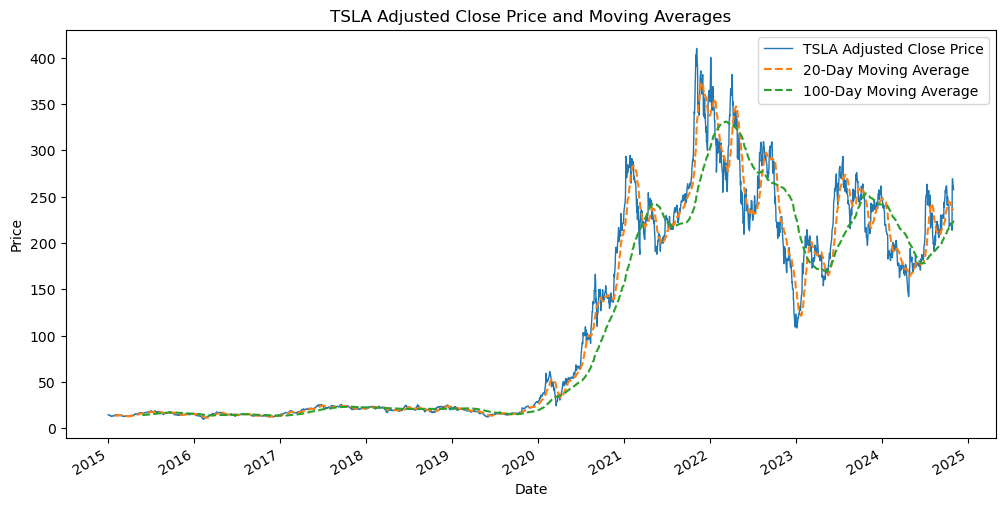

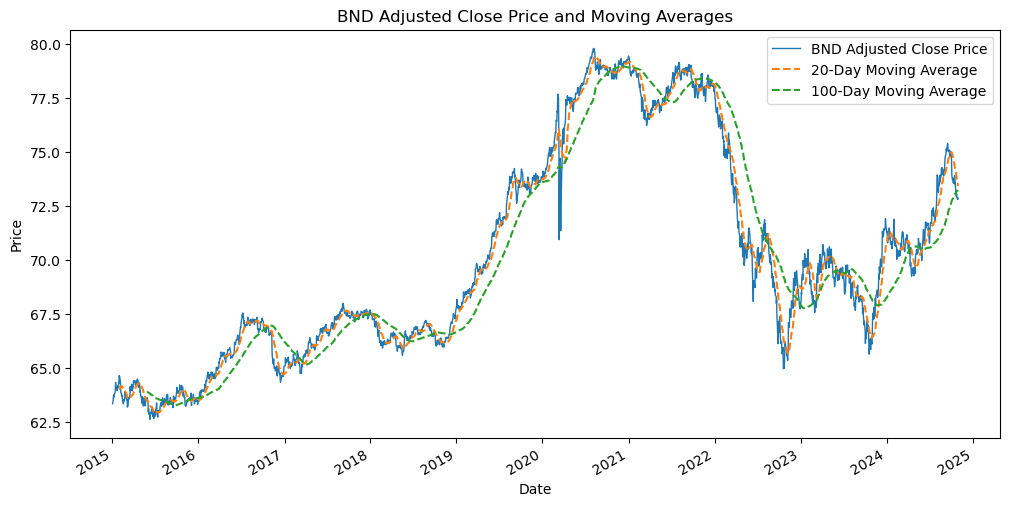

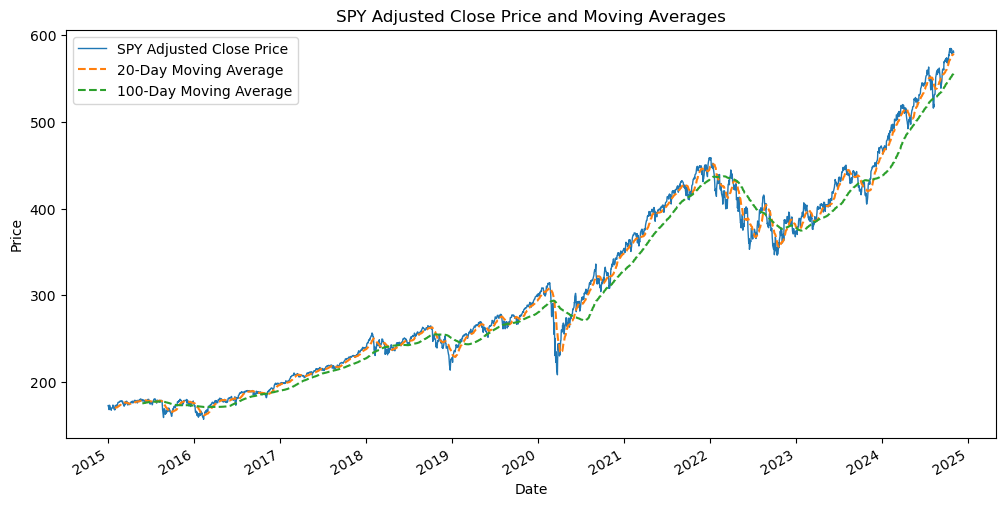

In [4]:
#This will help us visualize price trends over time for each asset.
import matplotlib.pyplot as plt

# Plot adjusted close prices and moving averages for each asset
for ticker in tickers:
    plt.figure(figsize=(12, 6))
    data[ticker]['Adj Close'].plot(label=f'{ticker} Adjusted Close Price', linewidth=1)
    data[ticker]['Adj Close'].rolling(window=20).mean().plot(label='20-Day Moving Average', linestyle='--')
    data[ticker]['Adj Close'].rolling(window=100).mean().plot(label='100-Day Moving Average', linestyle='--')
    plt.title(f'{ticker} Adjusted Close Price and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


## Calculating and Plotting Rolling Averages:

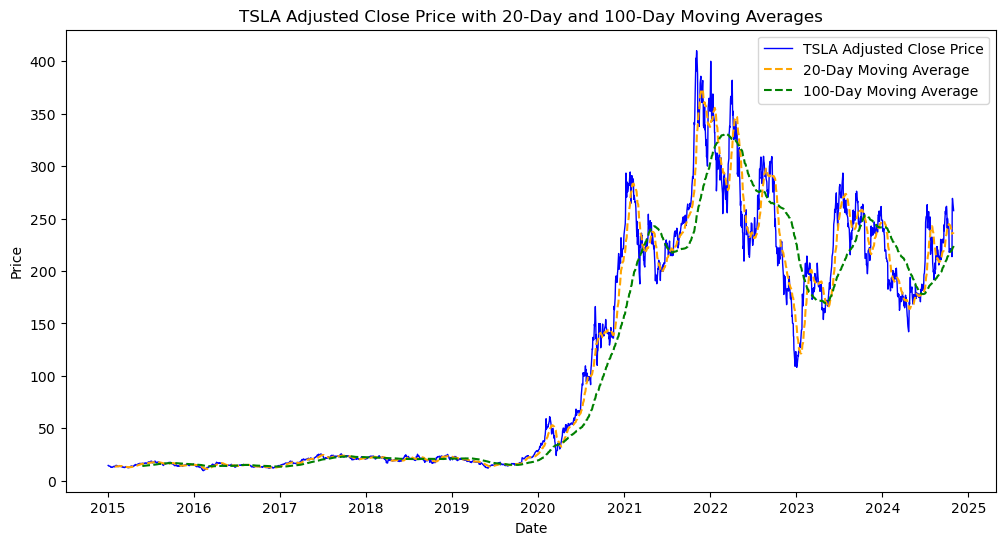

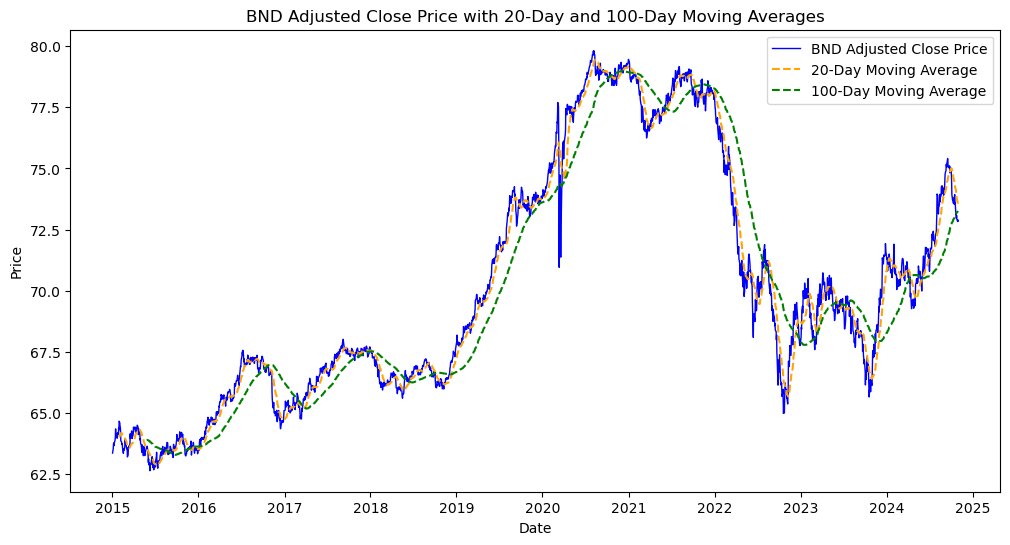

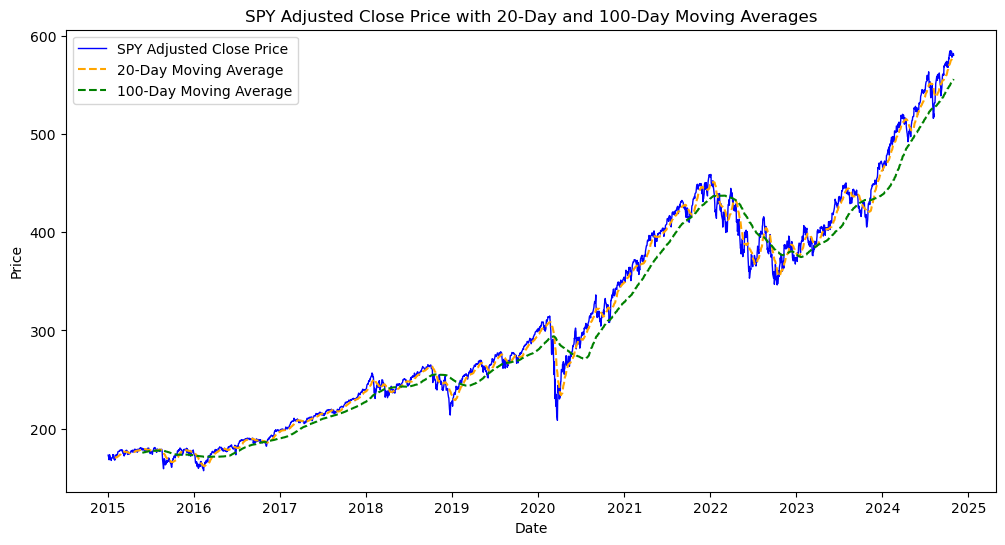

In [5]:
# 20-day and 100-day moving averages to observe short-term vs. long-term trends.
# Plot adjusted close prices along with 20-day and 100-day rolling averages for each asset
for ticker in tickers:
    plt.figure(figsize=(12, 6))
    
    # Plot the adjusted close price
    plt.plot(data[ticker].index, data[ticker]['Adj Close'], label=f'{ticker} Adjusted Close Price', color='blue', linewidth=1)
    
    # Plot the 20-day rolling average
    plt.plot(data[ticker].index, data[ticker]['Adj Close'].rolling(window=20).mean(), label='20-Day Moving Average', color='orange', linestyle='--')
    
    # Plot the 100-day rolling average
    plt.plot(data[ticker].index, data[ticker]['Adj Close'].rolling(window=100).mean(), label='100-Day Moving Average', color='green', linestyle='--')
    
    plt.title(f'{ticker} Adjusted Close Price with 20-Day and 100-Day Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


#### Volatility Analysis

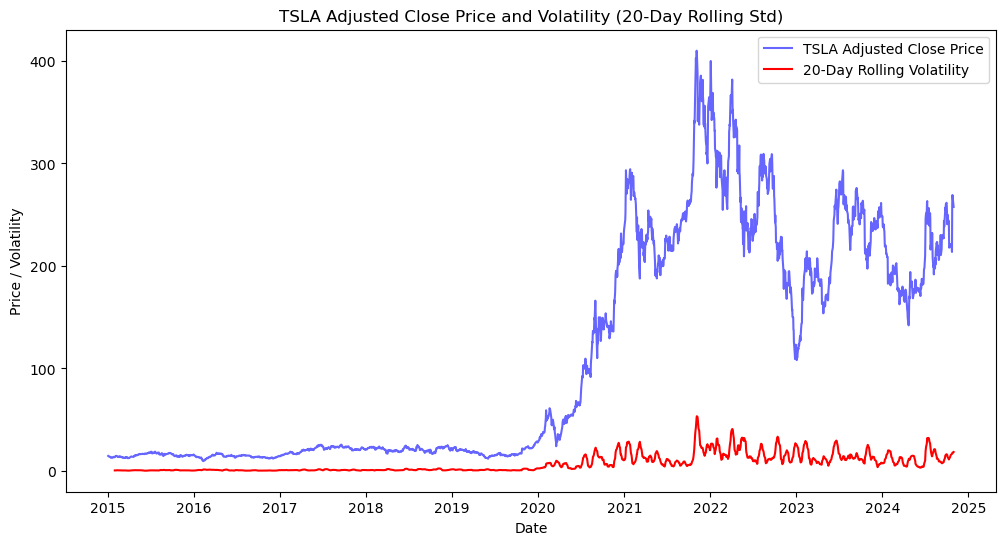

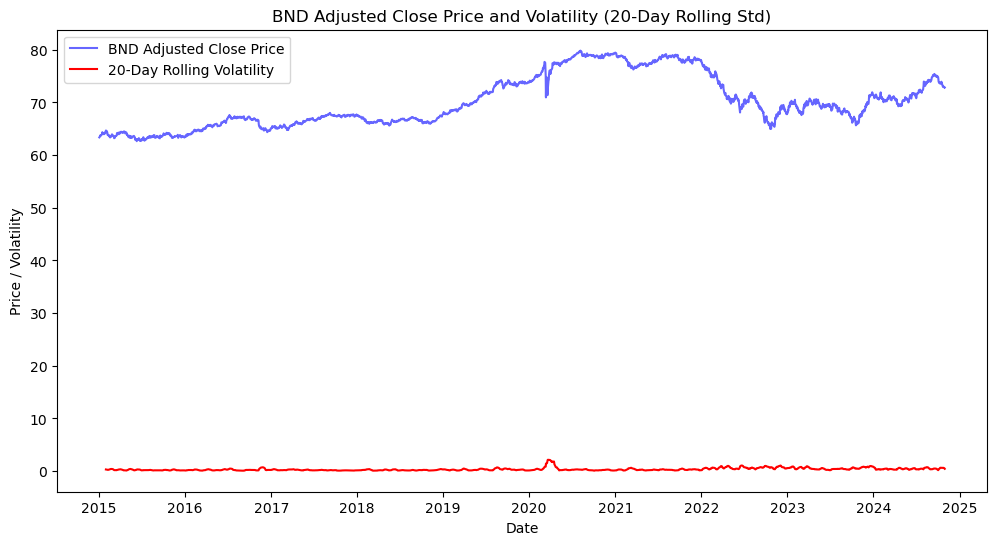

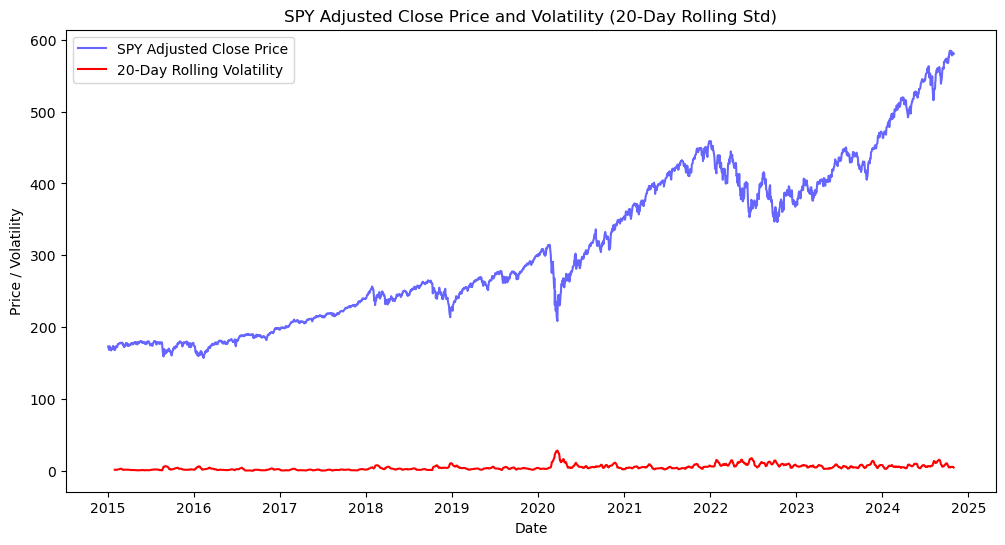

In [7]:
# Plot volatility using 20-day rolling standard deviation of the adjusted close price
for ticker in tickers:
    plt.figure(figsize=(12, 6))
    
    # Calculate the 20-day rolling standard deviation (volatility)
    volatility = data[ticker]['Adj Close'].rolling(window=20).std()
    
    # Plot adjusted close price and its volatility
    plt.plot(data[ticker].index, data[ticker]['Adj Close'], label=f'{ticker} Adjusted Close Price', color='blue', alpha=0.6)
    plt.plot(data[ticker].index, volatility, label='20-Day Rolling Volatility', color='red')
    
    plt.title(f'{ticker} Adjusted Close Price and Volatility (20-Day Rolling Std)')
    plt.xlabel('Date')
    plt.ylabel('Price / Volatility')
    plt.legend()
    plt.show()


## Model Preparation

In [8]:
# Define the train-test split date
train_end_date = '2022-12-31'

# Split data into training and testing sets for each asset
train_data = {}
test_data = {}

for ticker in tickers:
    # Training data
    train_data[ticker] = data[ticker].loc[:train_end_date]['Adj Close']
    
    # Testing data
    test_data[ticker] = data[ticker].loc[train_end_date:]['Adj Close']
    
    print(f"\n{ticker} Train Data Range: {train_data[ticker].index.min()} to {train_data[ticker].index.max()}")
    print(f"{ticker} Test Data Range: {test_data[ticker].index.min()} to {test_data[ticker].index.max()}")



TSLA Train Data Range: 2015-01-02 00:00:00 to 2022-12-30 00:00:00
TSLA Test Data Range: 2023-01-03 00:00:00 to 2024-10-30 00:00:00

BND Train Data Range: 2015-01-02 00:00:00 to 2022-12-30 00:00:00
BND Test Data Range: 2023-01-03 00:00:00 to 2024-10-30 00:00:00

SPY Train Data Range: 2015-01-02 00:00:00 to 2022-12-30 00:00:00
SPY Test Data Range: 2023-01-03 00:00:00 to 2024-10-30 00:00:00


##  Model Selection and Forecasting

In [10]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Dictionary to store models and forecasts
models = {}
forecasts = {}

for ticker in tickers:
    # Use auto_arima to find optimal parameters for ARIMA model
    print(f"\nFinding optimal ARIMA parameters for {ticker}...")
    arima_model = auto_arima(train_data[ticker], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
    
    # Print the chosen parameters
    print(f"\nOptimal ARIMA parameters for {ticker}: {arima_model.order}")
    
    # Fit the ARIMA model on training data
    models[ticker] = ARIMA(train_data[ticker], order=arima_model.order).fit()
    
    # Forecasting the test period
    forecasts[ticker] = models[ticker].forecast(steps=len(test_data[ticker]))
    
    # Print first few forecasted values
    print(f"\n{ticker} Forecasted values for the test period:\n", forecasts[ticker].head())



Finding optimal ARIMA parameters for TSLA...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12592.300, Time=2.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12588.157, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12587.306, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12587.409, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12586.350, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12588.328, Time=2.64 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.957 seconds

Optimal ARIMA parameters for TSLA: (0, 1, 0)

TSLA Forecasted values for the test period:
 2014    123.18
2015    123.18
2016    123.18
2017    123.18
2018    123.18
Name: predicted_mean, dtype: float64

Finding optimal ARIMA parameters for BND...
Performing stepwise search to minimize aic


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-201.871, Time=3.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-149.642, Time=0.48 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-147.937, Time=0.64 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-148.026, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-151.465, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-169.954, Time=3.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-174.033, Time=2.86 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-199.903, Time=5.99 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-199.904, Time=6.84 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-150.626, Time=1.92 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-173.359, Time=4.47 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-175.941, Time=2.30 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-197.872, Time=7.77 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-203.669, Time=1.55 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-171.727, Time=0.89 sec
 ARIMA(2,1

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users


BND Forecasted values for the test period:
 2014    67.661567
2015    67.632537
2016    67.696241
2017    67.748381
2018    67.719602
Name: predicted_mean, dtype: float64

Finding optimal ARIMA parameters for SPY...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10588.199, Time=4.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10675.468, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10659.374, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10660.830, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10675.159, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10659.720, Time=1.39 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10659.985, Time=1.79 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10589.418, Time=4.88 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10660.958, Time=4.75 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10658.854, Time=0.95 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10659.551, Time=2.59 sec
 AR

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



SPY Forecasted values for the test period:
 2014    374.297166
2015    373.478660
2016    373.939160
2017    373.849980
2018    373.601491
Name: predicted_mean, dtype: float64


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have forecasted data in a DataFrame `forecast_df` with columns 'date', 'actual', 'forecast'
# Create signals based on forecasted returns
forecast_df['signal'] = np.where(forecast_df['forecast'] > forecast_df['actual'], 1, -1)

# Calculate daily returns (for simplicity, we assume returns are based on actual price change)
forecast_df['return'] = forecast_df['actual'].pct_change()

# Simulate trading
initial_capital = 1000  # Starting with $1000
capital = initial_capital
portfolio_value = [capital]
positions = [0]  # 0 = no position, 1 = long, -1 = short

# Simulate trades
for i in range(1, len(forecast_df)):
    if forecast_df['signal'][i] == 1 and positions[-1] != 1:  # Buy Signal
        positions.append(1)
        capital = portfolio_value[-1] * (1 + forecast_df['return'][i])
    elif forecast_df['signal'][i] == -1 and positions[-1] != -1:  # Sell Signal
        positions.append(-1)
        capital = portfolio_value[-1] * (1 - forecast_df['return'][i])
    else:
        positions.append(positions[-1])
        capital = portfolio_value[-1] * (1 + forecast_df['return'][i])
    portfolio_value.append(capital)

# Track performance
forecast_df['portfolio_value'] = portfolio_value

# Calculate cumulative returns
forecast_df['cumulative_return'] = forecast_df['portfolio_value'] / initial_capital - 1

# Plot the portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(forecast_df['date'], forecast_df['portfolio_value'], label='Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Value Over Time')
plt.legend()
plt.show()

# Calculate performance metrics (e.g., Sharpe ratio, max drawdown)
daily_returns = forecast_df['return']
sharpe_ratio = daily_returns.mean() / daily_returns.std() * np.sqrt(252)  # Assuming 252 trading days in a year
max_drawdown = (forecast_df['portfolio_value'] / forecast_df['portfolio_value'].cummax() - 1).min()

print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Maximum Drawdown: {max_drawdown}")


NameError: name 'forecast_df' is not defined